<font color=green size=3>
При обучении датасета с большими изображениями мы вынуждены были использовать предобученную модель nano вместо модели small из-за необходимости экономии памяти.
<br>  
При этом время обучения кардинально уменьшилось, а результат не стал намного хуже.
<br>
Проведу еще один эксперимент с обучением нано модели (yolov8n.pt) на нашем первом датасете с большим количеством небольших изображений.
<br>
Посмотрим, сильно ли ухудшится результат предсказания при обучении на тех же 25 эпохах.
<br>
Проверим, сможем ли мы для повышения качества обучить модель на 100 эпохах.
</font>


In [ ]:
# скачиваем кадры из целевого фильма
#https://drive.google.com/file/d/1ZZTc9RWx31ebvRD3AfdxOioNMZnSKiwv/view?usp=drive_link

!pip install -q gdown==4.7.3
!gdown --quiet 1ZZTc9RWx31ebvRD3AfdxOioNMZnSKiwv -O image_paths_films.zip
!unzip -q "image_paths_films.zip"


In [ ]:
#https://drive.google.com/file/d/1us4X4X9MMaEnq02FQCd13W0T6oWpx9jt/view?usp=drive_link
#!mkdir ves
#!gdown --quiet 1us4X4X9MMaEnq02FQCd13W0T6oWpx9jt -O ves/best4.pt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# скачиваем датасет с апельсиновыми деревьями
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CQL5rwm3Xg5OTOzuPH8L")
project = rf.workspace("1-xjgvf").project("orange-8ywhf")
version = project.version(5)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Orange-5 in yolov8:: 100%|██████████| 10810/10810 [00:15<00:00, 685.11it/s] 


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

import supervision as sv
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# необходим для правильного отображения изображений в колабе
from google.colab.patches import cv2_imshow

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/78.2 GB disk)


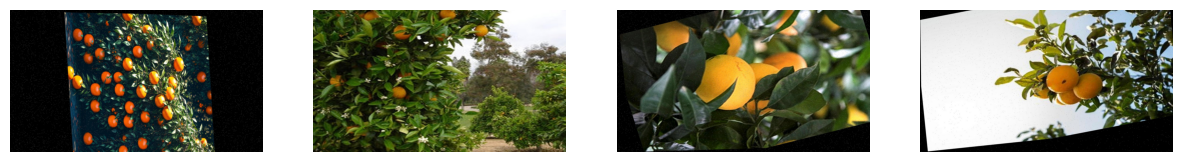

In [ ]:
# смотрим на изображения и аннотацию в датасете
# Пути к изображениям

image_paths = [
    '/content/Orange-5/train/images/00495-3859597343_png.rf.20a1bdc6107f94d07aa3e4e81ee97e86.jpg',
    '/content/Orange-5/train/images/101_orang_jpg.rf.34b2f123e7dd090d20bde1399b44a2b8.jpg',
    '/content/Orange-5/train/images/153_orang_jpg.rf.4fb90a7e02d64a66c47cb7379090e5d0.jpg',
    '/content/Orange-5/train/images/Naranjas_970_png_jpg.rf.fd0997e0e81bf817c4d88d686fa6c21f.jpg'
]


import yaml

def read_and_print_yaml(file_path):
    # Открываем файл и читаем его содержимое
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)

    # Выводим содержимое файла в нужном формате
    print(f"train: {data['train']}")
    print(f"val: {data['val']}")
    print(f"test: {data['test']}\n")
    print(f"nc: {data['nc']}")
    print(f"names: {data['names']}\n")
    print("roboflow:")
    for key, value in data['roboflow'].items():
        print(f"  {key}: {value}")





# Создаем subplot с тремя изображениями в одной строке
plt.figure(figsize=(15, 5))

for i, image_path in enumerate(image_paths, start=1):
    plt.subplot(1, 4, i)  # 1 строка, 3 столбца, i-тое изображение
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Отключаем оси для чистого отображения

plt.show()


In [ ]:
read_and_print_yaml('/content/Orange-5/data.yaml')

train: Orange-5/train/images
val: Orange-5/valid/images
test: ../test/images

nc: 1
names: ['orange']

roboflow:
  license: CC BY 4.0
  project: orange-8ywhf
  url: https://universe.roboflow.com/1-xjgvf/orange-8ywhf/dataset/5
  version: 5
  workspace: 1-xjgvf


In [ ]:
# меняем пути к изображениям на актуальные (необходимо для запуска обучения)
with open('/content/Orange-5/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Modify the data
data['train'] = '../train/images'
data['val'] = '../valid/images'

# Save the modified data back to the YAML file
with open('/content/Orange-5/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [ ]:
# проверяем
read_and_print_yaml('/content/Orange-5/data.yaml')

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['orange']

roboflow:
  license: CC BY 4.0
  project: orange-8ywhf
  url: https://universe.roboflow.com/1-xjgvf/orange-8ywhf/dataset/5
  version: 5
  workspace: 1-xjgvf


In [ ]:
# проверяем аннотацию
for i, image_path in enumerate(image_paths):
    # Чтение разметки
    label_path = image_path.replace('images', 'labels').replace('.jpg', '.txt')
    with open(label_path) as f:
        annotation = f.read()

    # Получение списка строк
    annotation = annotation.split('\n')
    print(f'{i} : {image_path} : {annotation}')


0 : /content/Orange-5/train/images/00495-3859597343_png.rf.20a1bdc6107f94d07aa3e4e81ee97e86.jpg : ['0 0.6207598071919996 0.71706216196862 0.05151621155368531 0.10626316452098047', '0 0.5901711763701315 0.6299187498693258 0.04240741427614125 0.09284219278018908', '0 0.6268676008413465 0.5777053559316336 0.04483631772423659 0.11054255214403552', '0 0.6381457035946916 0.5029024644426 0.04138393551025151 0.09371423532048809', '0 0.6644965535355298 0.3743051358011533 0.04842758735523915 0.10795336621595177', '0 0.7547991386829618 0.4552875833147339 0.05066799600636689 0.08956955616150035', '0 0.7368072113426946 0.06910060131031691 0.04132275601872237 0.06411154738367196', '0 0.4640236460372559 0.04851514364099923 0.043133270840401514 0.05033042526603684', '0 0.5025430092532107 0.2877663536738729 0.045696105383133796 0.10133717627040308', '0 0.4638368327851792 0.3833500868196097 0.04980820834746969 0.09877493203513289', '0 0.5693618059543278 0.47113236194329855 0.04181382933970023 0.08911154

In [ ]:
# скачиваем предобученную модель чуть больше слабейшей
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 61.2MB/s]


In [ ]:
# берем кадры из нашего целевого видео
image_paths_films = [
    '/content/image_paths_films/frame10020000.jpg',
    '/content/image_paths_films/frame20040000.jpg',
    '/content/image_paths_films/frame30000000.jpg',
    '/content/image_paths_films/frame4020000.jpg'
]

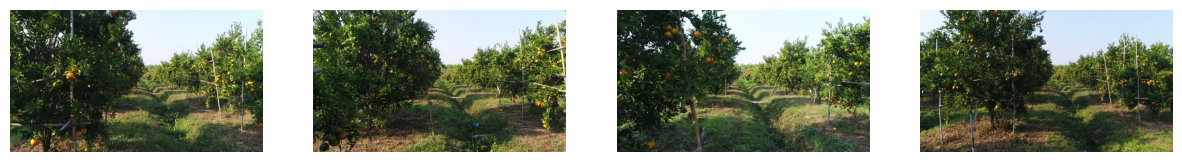

In [ ]:
# Создаем subplot с тремя изображениями в одной строке
plt.figure(figsize=(15, 5))

for i, image_path in enumerate(image_paths_films, start=1):
    plt.subplot(1, 4, i)  # 1 строка, 3 столбца, i-тое изображение
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Отключаем оси для чистого отображения

plt.show()

<font color=green size=3>
<br>  
дообучим нашу предварительно дообученную модель еще на 10 эпох

</font>

In [ ]:
#!cp /content/data.yaml /content/Orange-5/data.yaml

In [ ]:
#!rm -r runs

In [ ]:
yolo_model_best4 = YOLO('/content/ves/best4.pt')

In [ ]:
results_train = yolo_model_best4.train(data='/content/Orange-5/data.yaml', epochs=10)
#!cp runs /content/drive/MyDrive/data/itog_train_1/runs

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/ves/best4.pt, data=/content/Orange-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 12.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

AMP: checks passed ✅


train: Scanning /content/Orange-5/train/labels... 5364 images, 2 backgrounds, 0 corrupt: 100%|██████████| 5364/5364 [00:13<00:00, 391.13it/s]


train: New cache created: /content/Orange-5/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 273, len(boxes) = 104504. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Orange-5/valid/labels... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 210.63it/s]

val: New cache created: /content/Orange-5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.65G      1.356     0.7227      1.051        302        640: 100%|█████████▉| 335/336 [04:27<00:01,  1.13s/it]UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
       1/10      3.69G      1.356      0.723      1.051         63        640: 100%|██████████| 336/336 [04:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]

                   all         19        157      0.718      0.584      0.695       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       3.4G      1.413     0.7596      1.072         62        640: 100%|██████████| 336/336 [04:09<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         19        157      0.762      0.611      0.754      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.33G      1.433     0.7746      1.078         37        640: 100%|██████████| 336/336 [04:13<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         19        157      0.785      0.567      0.716      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.08G      1.423     0.7663      1.077         80        640: 100%|██████████| 336/336 [04:14<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         19        157      0.742       0.58      0.705       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.52G      1.399       0.75       1.07         91        640: 100%|██████████| 336/336 [04:14<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         19        157      0.765      0.601      0.698      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.14G      1.375     0.7314       1.06         75        640: 100%|██████████| 336/336 [04:13<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         19        157      0.769      0.592      0.743      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.95G       1.35     0.7145       1.05        118        640: 100%|██████████| 336/336 [04:22<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         19        157      0.787      0.631      0.756       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.87G      1.325     0.6996      1.042        126        640: 100%|██████████| 336/336 [04:12<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         19        157       0.87      0.669      0.799      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.39G      1.295     0.6835      1.033         59        640: 100%|██████████| 336/336 [04:13<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         19        157      0.894      0.645      0.802      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.42G      1.268     0.6678      1.026         66        640: 100%|██████████| 336/336 [04:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


                   all         19        157      0.893      0.656       0.81      0.328

10 epochs completed in 0.718 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


                   all         19        157      0.869      0.673      0.799      0.337
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
validation_results = yolo_model_best4.val(data='/content/Orange-5/data.yaml')

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Orange-5/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


                   all         19        157      0.875      0.682       0.81      0.337
Speed: 0.2ms preprocess, 24.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


<font color=green size=3>
Метрики при дообучении на дополнительныз 10 эпохах по сравнению с 25 эпохами улучшились.
<br>
Потенциал к дальнейшему обученнию есть.
</font>

In [ ]:
# проверяем, как предсказывает предобученная nano модель дообученная на 35 эпохах по кадрам из нашего целевого видео
for img_in in image_paths_films:
  results = yolo_model_best4.predict(img_in)
  result = results[0]
  detections = sv.Detections.from_ultralytics(result)

  bounding_box_annotator = sv.BoundingBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  labels = [
    yolo_model_best4.model.names[class_id]
    for class_id
    in detections.class_id
  ]

  image = cv2.imread(img_in)

  annotated_image = bounding_box_annotator.annotate(
     scene=image, detections=detections)
  annotated_image = label_annotator.annotate(
     scene=annotated_image, detections=detections, labels=labels)

  sv.plot_image(annotated_image)
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if class_id == 'orange' :
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      print("Object type:", class_id)
      print("Coordinates:", cords)
      print("Probability:", conf)
      print("---")


Output hidden; open in https://colab.research.google.com to view.

<font color=green size=3>
Предсказания после 10 эпох улучшились.
</font>

In [ ]:
Визуально улучшений не видно.